# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

data = pd.read_csv('/Users/martinez/Documents/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
# 3. First look at its main features (head, shape, info).

data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [6]:
# 4. Rename the columns so they follow the PE8 (snake case).
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [8]:
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# 5. Change effective to date column to datetime format.
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [10]:
# 6. Check NaN values per column.
nulls = data.isnull().sum(axis = 0)
nulls

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
# 7. Define a function that differentiates between continuous and discrete variables. 
# Hint: A number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [12]:
continuous = data.select_dtypes(include=['datetime64', 'float64'])
continuous

,customer_lifetime_value,effective_to_date,total_claim_amount
0,2763.519279,2011-02-24,384.811147
1,6979.535903,2011-01-31,1131.464935
2,12887.431650,2011-02-19,566.472247
3,7645.861827,2011-01-20,529.881344
4,2813.692575,2011-02-03,138.130879
...,...,...,...
9129,23405.987980,2011-02-10,198.234764
9130,3096.511217,2011-02-12,379.200000
9131,8163.890428,2011-02-06,790.784983
9132,7524.442436,2011-02-03,691.200000


In [13]:
categorical = data.select_dtypes(include=[np.object])
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [14]:
discrete = data.select_dtypes(include=[np.int64])
discrete

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [15]:
# 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [16]:
categorical['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [17]:
# 9. Get categorical features.

In [18]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [19]:
dummy = pd.get_dummies(categorical, columns=['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],drop_first=True)

In [20]:
dummy.head()

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,customer_AB21519,customer_AB23825,customer_AB26022,customer_AB31813,customer_AB45325,customer_AB60627,customer_AB62982,customer_AB69140,customer_AB72731,customer_AB73565,customer_AB78984,customer_AB96670,customer_AB98823,customer_AC13887,customer_AC22873,customer_AC24378,customer_AC40767,customer_AC42963,customer_AC58002,customer_AC67315,customer_AC73173,customer_AC75391,customer_AC79024,customer_AD12500,customer_AD18174,customer_AD28349,customer_AD28535,customer_AD33653,customer_AD33971,customer_AD38685,customer_AD56037,customer_AD63766,customer_AD71478,customer_AD89594,customer_AD95939,customer_AE23906,customer_AE30506,customer_AE60813,customer_AE62631,customer_AE74442,customer_AE89300,customer_AE90216,customer_AE93522,customer_AE98193,customer_AF10970,customer_AF17671,customer_AF20716,customer_AF36894,customer_AF37776,customer_AF41118,customer_AF47139,customer_AF48816,customer_AF49027,customer_AF49625,customer_AF69537,customer_AF81450,customer_AG22225,customer_AG32304,customer_AG39150,customer_AG45299,customer_AG47947,customer_AG56998,customer_AG58599,customer_AG62087,customer_AG62140,customer_AG85127,customer_AG85615,customer_AH17051,customer_AH22694,customer_AH39293,customer_AH41065,customer_AH41449,customer_AH53588,customer_AH55475,customer_AH58807,customer_AH65907,customer_AH84063,customer_AH89786,customer_AH92481,customer_AH97088,customer_AH99727,customer_AI11191,customer_AI14767,customer_AI16519,customer_AI47152,customer_AI49188,customer_AI49712,customer_AI58313,customer_AI58500,customer_AI61368,customer_AI74959,customer_AI85843,customer_AJ32539,customer_AJ58038,customer_AJ69060,customer_AJ69778,customer_AJ89107,customer_AJ89108,customer_AK11669,customer_AK11719,customer_AK17025,customer_AK44985,customer_AK46006,customer_AK54675,customer_AK59340,customer_AK61491,customer_AK72422,customer_AK90865,customer_AL21967,customer_AL27471,customer_AL35726,customer_AL43475,customer_AL43715,customer_AL46984,customer_AL50693,customer_AL78075,customer_AL95338,customer_AL96740,customer_AM17304,customer_AM26598,customer_AM26717,customer_AM28777,customer_AM29546,customer_AM30008,customer_AM32820,customer_AM34581,customer_AM36670,customer_AM52614,customer_AM53473,customer_AM57175,customer_AM72411,customer_AM79057,customer_AM88377,customer_AM89558,customer_AM92343,customer_AM94127,customer_AM97901,customer_AM99192,customer_AN21193,customer_AN32867,customer_AN36757,customer_AN47199,customer_AN53225,customer_AN57220,customer_AN67558,customer_AN79079,customer_AN80983,customer_AN97123,customer_AO20938,customer_AO40386,customer_AO42003,customer_AO46433,customer_AO74776,customer_AO77635,customer_AO87348,customer_AO98601,customer_AP23850,customer_AP27994,customer_AP32891,customer_AP34711,customer_AP46166,customer_AP47670,customer_AP52126,customer_AP52565,customer_AP56340,customer_AP59947,customer_AP63665,customer_AP65984,customer_AP66226,customer_AP67935,customer_AP89323,customer_AP90638,customer_AP95078,customer_AP98768,customer_AQ11656,customer_AQ25590,customer_AQ30231,customer_AQ34238,customer_AQ46199,customer_AQ51159,customer_AQ51368,customer_AQ52711,customer_AQ70385,customer_AQ70619,customer_AQ91207,customer_AQ94108,customer_AR17553,customer_AR25213,customer_AR40217,customer_AR47849,customer_AR59416,customer_AR61426,customer_AR63478,customer_AR69517,customer_AR75105,customer_AR83514,customer_AR96516,customer_AR99766,customer_AS17174,customer_AS18084,customer_AS26192,customer_AS48176,customer_AS55478,customer_AS55677,customer_AS60178,customer_AS62048,customer_AS77287,customer_AS78838,customer_AS93181,customer_AS97690,customer_AS99827,customer_AT13963,customer_AT18041,customer_AT24793,customer_AT26484,customer_AT29024,customer_AT30076,customer_AT31367,customer_AT33529,customer_AT36002,customer_AT41276,customer_AT49447,customer_AT52647,customer_AT55072,customer_AT62618,cust

In [21]:
# 10. What should we do with the customer_id column?

categorical = categorical.set_index(categorical['customer'])
categorical = categorical.drop(['customer'], axis=1)
categorical.head()

# If we put customer as index, we won't be able to merge the table after. 
# but we can't just drop it because it doesn't give important informations.

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
# 1. Import the necessary libraries if you are starting a new notebook. DONE

In [23]:
# 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

continuous_df = data.select_dtypes(include=['datetime64', 'float64'])
discrete_df = data.select_dtypes(include=[np.int64])

In [24]:
discrete_df.columns

Index(['income', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [25]:
continuous_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'total_claim_amount'], dtype='object')

In [26]:
# 3. Plot a correlation matrix, what can you see?

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data3 = pd.concat([continuous_df,discrete_df],join = 'inner',axis =1)

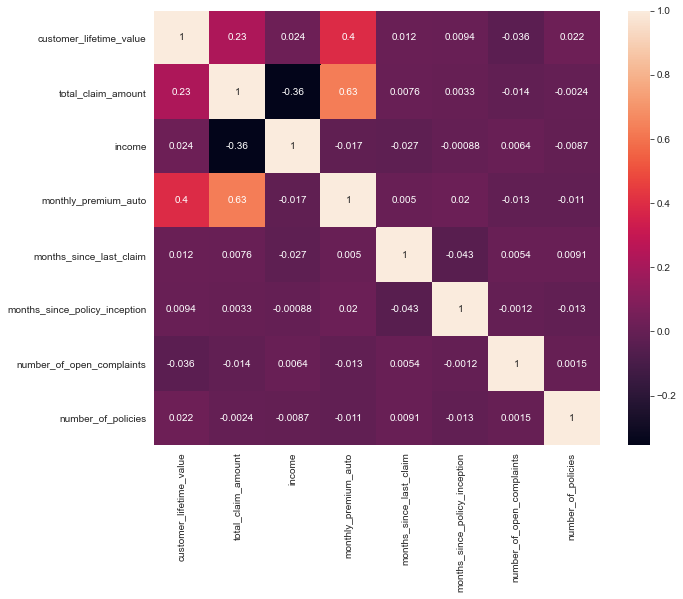

In [28]:
corr_matrix=data3.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [29]:
# 4. Create a function to plot every discrete variables. 

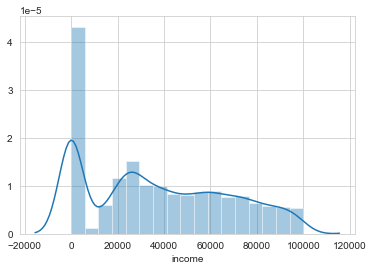

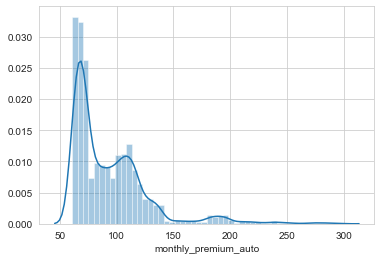

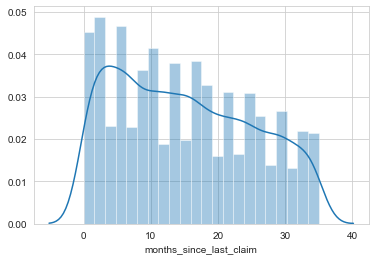

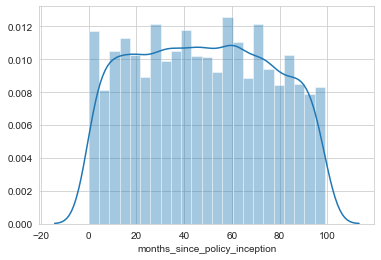

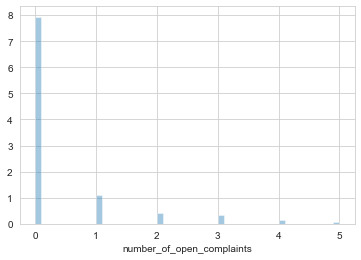

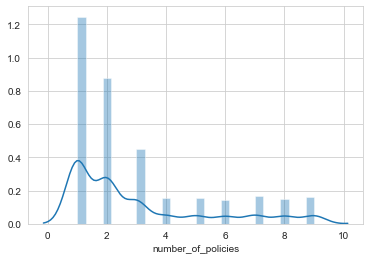

In [31]:
for i in list(discrete_df.columns):
    sns.distplot(discrete_df[i])
    plt.show()

In [32]:
# Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

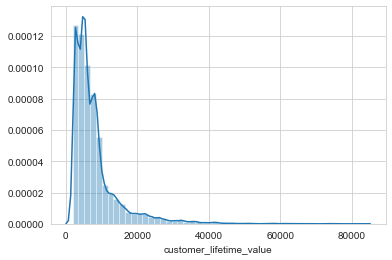

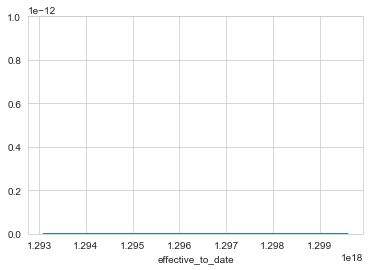

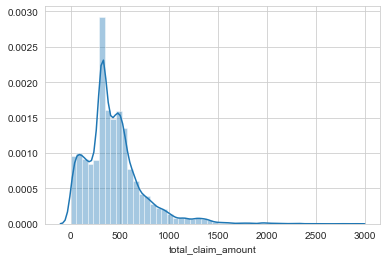

In [33]:
for i in list(continuous_df.columns):
    sns.distplot(continuous_df[i])
    plt.show()

In [34]:
# 5. What can you see in the plots?

In [35]:
# 7. Have you found outliers? If you have, what should we do with them?
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 16414.04
The number of points outise the upper wisker is:  817


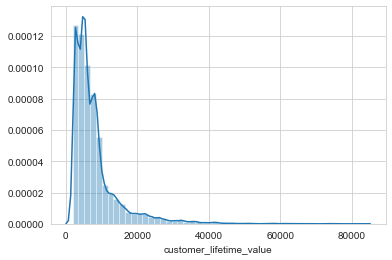

In [36]:
continuous_df['customer_lifetime_value'] = continuous_df['customer_lifetime_value'].fillna(np.mean(continuous_df['customer_lifetime_value']))
sns.distplot(continuous_df['customer_lifetime_value'])
plt.show()

In [37]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['total_claim_amount'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 960.40
The number of points outise the upper wisker is:  453


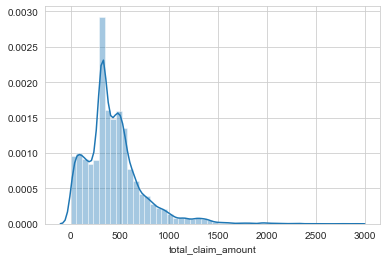

In [38]:
continuous_df['total_claim_amount'] = continuous_df['total_claim_amount'].fillna(np.mean(continuous_df['customer_lifetime_value']))
sns.distplot(continuous_df['total_claim_amount'])
plt.show()

In [39]:
# 8. Check nan values per column.
continuous_df_nulls = continuous_df.isnull().sum(axis = 0)
continuous_df_nulls

customer_lifetime_value    0
effective_to_date          0
total_claim_amount         0
dtype: int64

In [40]:
discrete_df_nulls = discrete_df.isnull().sum(axis = 0)
discrete_df_nulls

income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

## Lab | Feature extraction

In [41]:
# Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


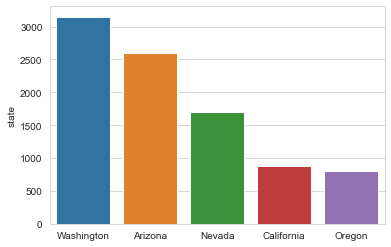

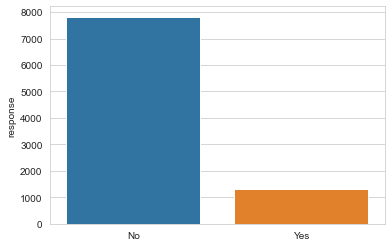

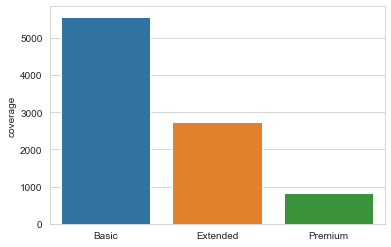

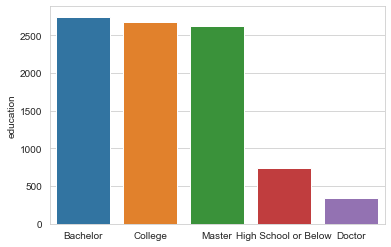

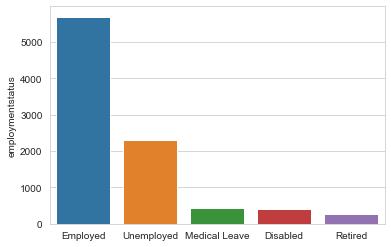

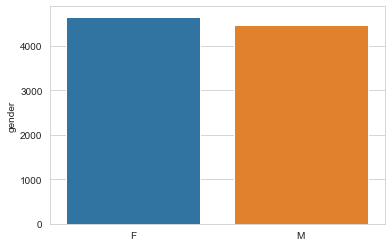

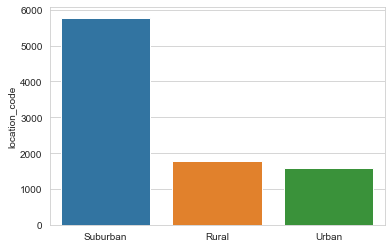

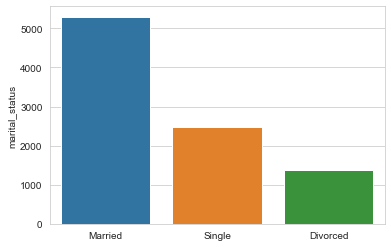

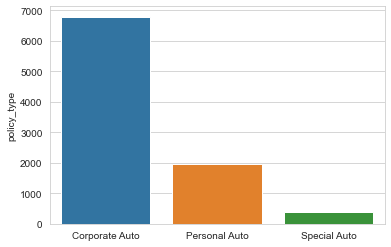

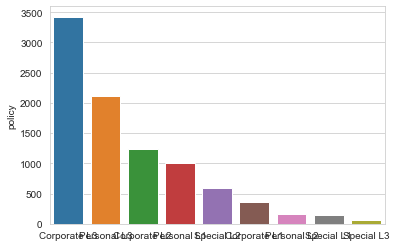

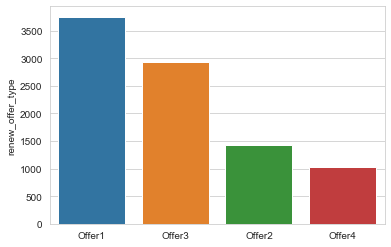

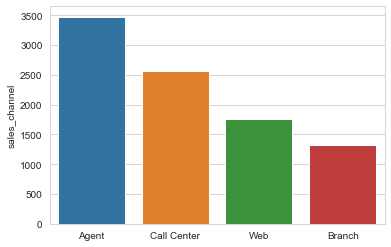

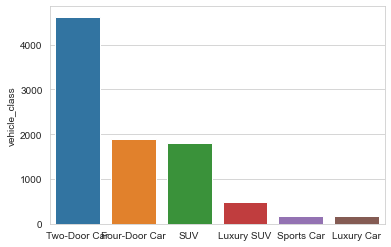

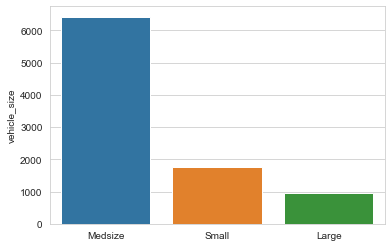

In [45]:
for i in list(categorical.columns):
    sns.barplot(x=categorical[i].unique(),y=categorical[i].value_counts())
    plt.show()

In [46]:
# There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them? drop the column customer.
categorical.info

<bound method DataFrame.info of                state response  coverage education employmentstatus gender  \
customer                                                                    
BU79786   Washington       No     Basic  Bachelor         Employed      F   
QZ44356      Arizona       No  Extended  Bachelor       Unemployed      F   
AI49188       Nevada       No   Premium  Bachelor         Employed      F   
WW63253   California       No     Basic  Bachelor       Unemployed      M   
HB64268   Washington       No     Basic  Bachelor         Employed      M   
...              ...      ...       ...       ...              ...    ...   
LA72316   California       No     Basic  Bachelor         Employed      M   
PK87824   California      Yes  Extended   College         Employed      F   
TD14365   California       No  Extended  Bachelor       Unemployed      M   
UP19263   California       No  Extended   College         Employed      M   
Y167826   California       No  Extended   Co

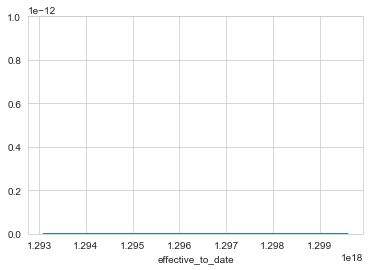

In [48]:
# Plot time variable. Can you extract something from it?
continuous_df['effective_to_date'] = continuous_df['effective_to_date'].fillna(np.mean(continuous_df['effective_to_date']))
sns.distplot(continuous_df['effective_to_date'])
plt.show()

In [49]:
# Nothing to extract from this variable.